In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotting
from plotting.plotting_functions import *

In [2]:
### directories
output_dir = 'output_data/'
input_dir = 'input_data/'
fig_dir = 'figs/'

# Constants
cms_to_mgd = 22.82
cm_to_mg = 264.17/1e6
cfs_to_mgd = 0.0283 * 22824465.32 / 1e6


### list of reservoirs and major flow points to compare across models
reservoir_list = ['cannonsville', 'pepacton', 'neversink', 'wallenpaupack', 'prompton', 'shoholaMarsh', \
                   'mongaupeCombined', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon', \
                   'assunpink', 'ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane', 'marshCreek']

majorflow_list = ['delLordville', 'delMontague', 'delTrenton', 'outletAssunpink', 'outletSchuylkill', 'outletChristina',
                  '01425000', '01417000', '01436000', '01433500', '01449800',
                  '01447800', '01463620', '01470960']

reservoir_link_pairs = {'cannonsville': '01425000',
                           'pepacton': '01417000',
                           'neversink': '01436000',
                           'mongaupeCombined': '01433500',
                           'beltzvilleCombined': '01449800',
                           'fewalter': '01447800',
                           'assunpink': '01463620',
                           'blueMarsh': '01470960'}

## System inputs
rerun_all = False
use_WEAP = False

start_date = '1999-06-01'
end_date = '2010-05-31'

## Load data    
# Load Pywr-DRB simulation models
print('Retrieving simulation data.')
if use_WEAP:
    pywr_models = ['obs_pub', 'nhmv10', 'nwmv21_withLakes', 'WEAP_23Aug2022_gridmet_nhmv10']
else:
    pywr_models = ['obs_pub', 'nhmv10', 'nwmv21_withLakes']

res_releases = {}
major_flows = {}

for model in pywr_models:
    res_releases[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'res_release').loc[start_date:end_date,:]
    major_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'major_flow').loc[start_date:end_date,:]
pywr_models = [f'pywr_{m}' for m in pywr_models]

# Load base (non-pywr) models
if use_WEAP:
    base_models = ['obs', 'obs_pub', 'nhmv10', 'nwmv21', 'WEAP_23Aug2022_gridmet']
else:
    base_models = ['obs', 'obs_pub', 'nhmv10', 'nwmv21']

datetime_index = list(res_releases.values())[0].index
for model in base_models:
    res_releases[model] = get_base_results(input_dir, model, datetime_index, 'res_release').loc[start_date:end_date,:]
    major_flows[model] = get_base_results(input_dir, model, datetime_index, 'major_flow').loc[start_date:end_date,:]

# Verify that all datasets have same datetime index
for r in res_releases.values():
    assert ((r.index == datetime_index).mean() == 1)
for r in major_flows.values():
    assert ((r.index == datetime_index).mean() == 1)
print(f'Successfully loaded {len(base_models)} base model results & {len(pywr_models)} pywr model results')


Retrieving simulation data.
Successfully loaded 4 base model results & 3 pywr model results


In [3]:
### load catchment withdrawal/consumption data
withdrawals = {}
consumptions = {}

pywr_models = ['obs_pub', 'nhmv10', 'nwmv21_withLakes']

for model in pywr_models:
    withdrawals[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'withdrawal').loc[start_date:end_date,:]
    withdrawals[f'pywr_{model}']['total'] = withdrawals[f'pywr_{model}'].sum(axis=1)
    consumptions[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'consumption').loc[start_date:end_date,:]
    consumptions[f'pywr_{model}']['total'] = consumptions[f'pywr_{model}'].sum(axis=1)
    
pywr_models = [f'pywr_{m}' for m in pywr_models]



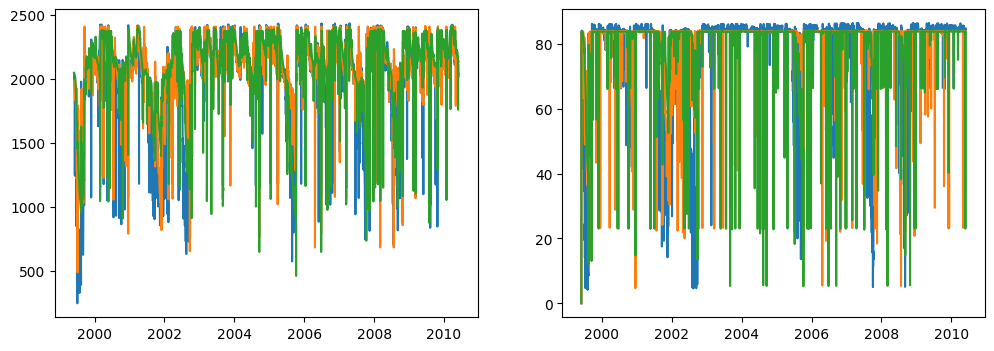

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m, df in withdrawals.items():
    axs[0].plot(df['total'])
for m, df in consumptions.items():
    axs[1].plot(df['total'])

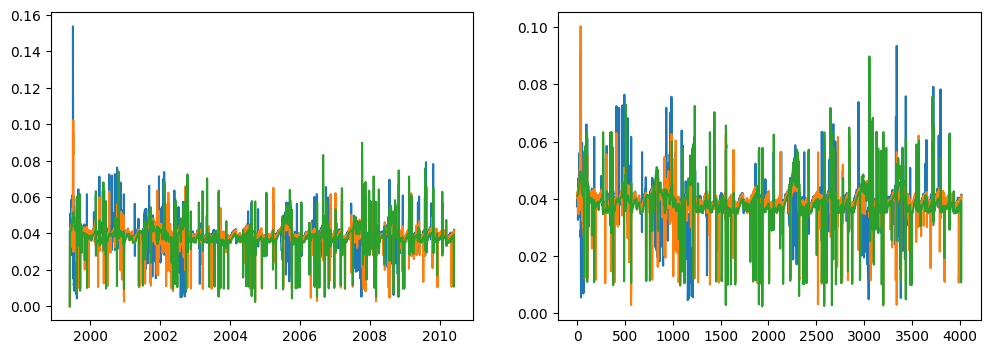

In [5]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    axs[0].plot(consumptions[m]['total'] / withdrawals[m]['total'])
for m in withdrawals.keys():
    axs[1].plot(consumptions[m]['total'].iloc[1:].values / withdrawals[m]['total'].iloc[:-1].values)

In [18]:
prev_flows = {}

pywr_models = ['obs_pub', 'nhmv10', 'nwmv21_withLakes']

for model in pywr_models:
    prev_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'prev_flow_catchmentWithdrawal').loc[start_date:end_date,:]
    prev_flows[f'pywr_{model}']['total'] = prev_flows[f'pywr_{model}'].sum(axis=1)
    max_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'max_flow_catchmentConsumption').loc[start_date:end_date,:]
    max_flows[f'pywr_{model}']['total'] = max_flows[f'pywr_{model}'].sum(axis=1)


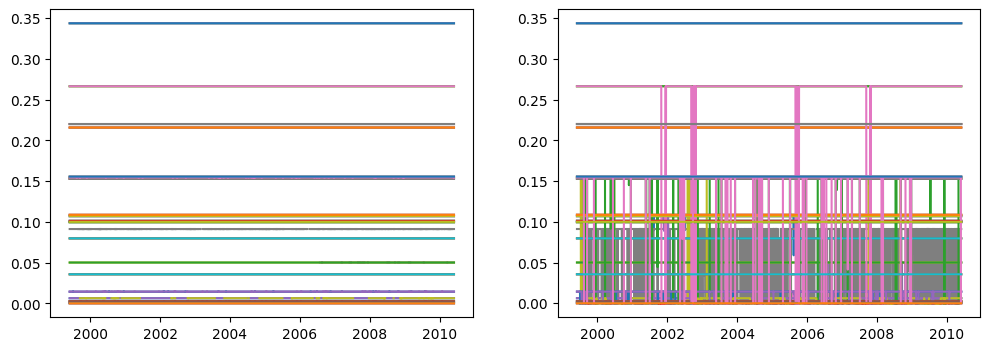

In [19]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    for c in prev_flows[m].columns:
        if c != 'total':
            axs[0].plot(max_flows[m][c] / prev_flows[m][c])
            axs[1].plot(consumptions[m][c] / prev_flows[m][c])
# for m in withdrawals.keys():
#     axs[1].plot(max_flows[m]['total'].iloc[1:].values / prev_flows[m]['total'].iloc[:-1].values)

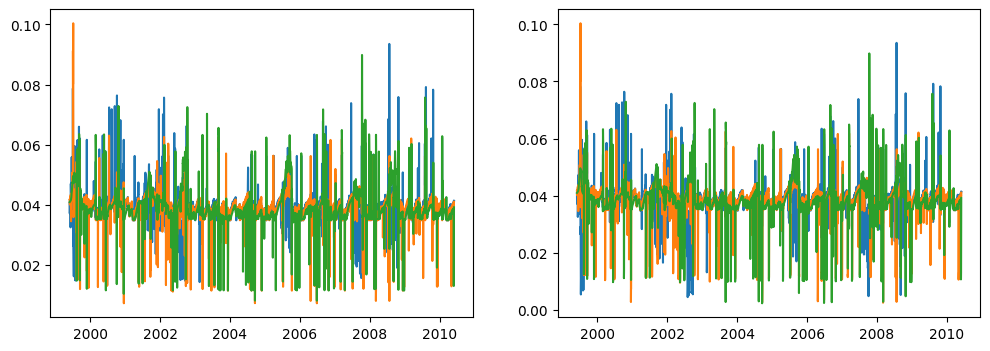

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    axs[0].plot(max_flows[m]['total'] / prev_flows[m]['total'])
    axs[1].plot(consumptions[m]['total'] / prev_flows[m]['total'])
